<a href="https://colab.research.google.com/github/Nedac23/Machine-Learning/blob/main/ML_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caden Thompson Machine Learning Homework 1


**Problem #1:**

J($\theta$$_1$,$\theta$$_2$) = $\theta$$_1$^2 + 4$\theta$$_2$^2 +$\theta$$_1$θ$_2$

*Intial Loss:*

J(-3,3) = (-3)^2 + 4(3)^2 + (-3*3) = 36

*Find Partial Derivatives:*

dJ/d$\theta$$_1$ = 2θ$_1$ + 0 + $\theta$$_2$ = 2$\theta$$_1$ + $\theta$$_2$

dJ/d$\theta$$_2$ = 0 + 8$\theta$$_2$ + $\theta$$_1$ = 8$\theta$$_2$ + $\theta$$_1$

*Evaluate at Starting Point:*

= 2(-3) + 3 = -3

= 24 + -3 = 21

$\Delta$J(-3, 3) = (-3,2 1)

update is (3, -21)  




*Learning Rate 0.03:*

$\theta$$_1new$ = -3 - .03(-3) = -2.91

$\theta$$_2new$ = 3 - .03(21) = 2.37

*Evaluate with new values:*

J(-2.91, 2.37) = (-2.91)^2 + 4(2.37)^2 + (-2.91*2.37) = 24.039  




*Learning Rate 0.5:*

$\theta$$_1new$ = -3 - .5(-3) = -1.5

$\theta$$_2new$ = 3 - .5(21) = -7.5

*Evaluate with new values:*

J(-1.5, -7.5) = (-1.5)^2 + 4(-7.5)^2 + (-1.5*-7.5) = 238.5



Least Squares Results without L2 Regularization: 

Coeffecients found: 
[[  1.02528985 -20.32905656   8.06448547  42.53484315  16.42850534
  -19.18188818 -21.34569885 -16.48570377  -0.52953969  13.19796976]]

Equation Found (Rounded): 
f(x,x1) =  1  +  -20 * x1 + 8 * x + 43 * x1**2 +  16 * x*x1 + -19 * x**2 + -21 * x1**3 + -16 * x * x1**2 +  -1 *x**2* x1 +  13 *x**3


L2 Regularization: 

Coeffecients found: 
[[-0.15535428  0.3892471  -0.46499269  2.04011217  0.48644731  1.40500802
   1.41925828  1.4375217   0.07001315  2.16175644]]

Equation Found (Rounded): 
f(x,x1) =  0  +  0 * x1 + 0 * x + 2 * x1**2 +  0 * x*x1 + 1 * x**2 + 1 * x1**3 + 1 * x * x1**2 +  0 *x**2* x1 +  2 *x**3


Plots for both Least Squares and L2 Regularization: 


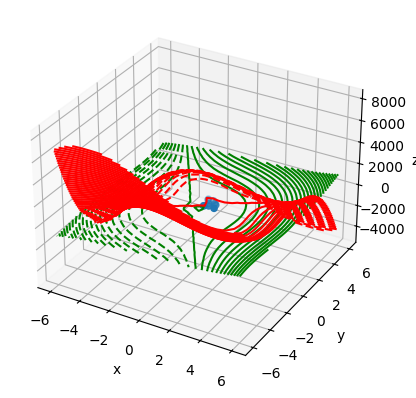

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
#Problem 2


import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
# Set random seed for reproducibility
np.random.seed(42)
# Generate 10 samples with 2 features
X = np.random.rand(10, 2)  # Shape: (10, 2)
y = 4 * X[:, 0]**3 + 3 * X[:, 1]**3 + 2 * X[:, 0] * X[:, 1] + np.random.randn(10) * 0.1  # Shape: (10,)
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], y)


#Least Squares implementaion without L2 Regularization
print("Least Squares Results without L2 Regularization: ")
print()
  #Using PolynomialFeatures based on the reccomendation from Dr.Chen
poly = PolynomialFeatures(3)
X_prime = poly.fit_transform(X)
  #Calucalting Least Squares
theta = (np.matrix(X_prime.T @ X_prime).I @ X_prime.T) @ y
print("Coeffecients found: ")
print(theta)
print()
print("Equation Found (Rounded): ")
print("f(x,x1) = ",round(theta[0,0])," + ",round(theta[0,1]),"* x1 +", round(theta[0,2]), "* x +", round(theta[0,3]),  "* x1**2 + ",round(theta[0,4]),"* x*x1 +", round(theta[0,5]),"* x**2 +",round(theta[0,6]),"* x1**3 +",round(theta[0,7]),"* x * x1**2 + ",round(theta[0,8]),"*x**2* x1 + ",round(theta[0,9]),"*x**3")


#plotting
def f(x, x1):
    return theta[0,0] + theta[0,1] * x1 + theta[0,2] * x + theta[0,3] * x1**2 + theta[0,4] * x*x1 +  theta[0,5] * x**2 +   theta[0,6] * x1**3  + theta[0,7] * x * x1**2 + theta[0,8] *x**2* x1 + theta[0,9] *x**3
#k + ix1 + hx + gx1^2 + fxx1 + ex^2 + dx1^3 + cxx1^2 + bx^2x1 + ax^3
x = np.linspace(-6, 6, 30)
x1 = np.linspace(-6, 6, 30)
X, X1 = np.meshgrid(x, x1)
Z = f(X, X1)
fig = plt.figure()
#https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
ax.contour3D(X, X1, Z, 50, colors='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
print()
print()


#L2 Regularization
print("L2 Regularization: ")
#From the visualization techinques used it was difficult to determine what values were better fitting the data.
#A lambda of .001 seemed to be a good balance bewtween regularizing the equation and still maintaing some coefficients
lambda1 = .001

#L2 Regularization Formula
one = np.matrix(X_prime.T @ X_prime)
f = X_prime.shape[1]
Ident = np.identity(f)
regularized_matrix = ((one + lambda1 * Ident).I @ X_prime.T) @ y
print()
print("Coeffecients found: ")
print(regularized_matrix)
print()
print("Equation Found (Rounded): ")
print("f(x,x1) = ",round(regularized_matrix[0,0])," + ",round(regularized_matrix[0,1]),"* x1 +", round(regularized_matrix[0,2]), "* x +", round(regularized_matrix[0,3]),  "* x1**2 + ",round(regularized_matrix[0,4]),"* x*x1 +", round(regularized_matrix[0,5]),"* x**2 +",round(regularized_matrix[0,6]),"* x1**3 +",round(regularized_matrix[0,7]),"* x * x1**2 + ",round(regularized_matrix[0,8]),"*x**2* x1 + ",round(regularized_matrix[0,9]),"*x**3")



print()
print()
print("Plots for both Least Squares and L2 Regularization: ")

#plotting
def f(x, x1):
    return regularized_matrix[0,0] + regularized_matrix[0,1] * x1 + regularized_matrix[0,2] * x + regularized_matrix[0,3] * x1**2 + regularized_matrix[0,4] * x*x1 +  regularized_matrix[0,5] * x**2 +   regularized_matrix[0,6] * x1**3  + regularized_matrix[0,7] * x * x1**2 + regularized_matrix[0,8] *x**2* x1 + regularized_matrix[0,9] *x**3
x = np.linspace(-6, 6, 30)
x1 = np.linspace(-6, 6, 30)
X, X1 = np.meshgrid(x, x1)
Z = f(X, X1)
fig = plt.figure()
ax.contour3D(X, X1, Z, 50, colors='g')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');







In [ ]:
#Problem 3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
# Set random seed for reproducibility
np.random.seed(123)

# Generate 10 samples with 2 features
X = np.random.rand(10, 2)  # Shape: (10, 2)
# Generate target variable y with a cubic relationship
y = 4 * X[:, 0]**3 + 3 * X[:, 1]**3 + 2 * X[:, 0] * X[:, 1] + np.random.randn(10) * 0.1  # Shape: (10,)
#rint(X)

#one column trick to include b (similar to what was done in problem 2)
poly = PolynomialFeatures(3)
X_prime = poly.fit_transform(X)

def L1regression(X, y, lambda_l1,learning_rate=0.001, epochs=1000):
  #intialize and define m and w
  m=len(X)
  w = np.zeros(len(X))
  #gradinet descent and updates
  for epoch in range(epochs):
      y_pred =X @ w

      # Compute the gradients
      dw = (1 / m) * X.T @ (y_pred - y)  # Gradient of loss w.r.t. weights
      w = w - learning_rate * (dw + lambda_l1 * np.sign(w)) # L1 penalty applied

      #Notes while trying to figure out how to do the problem:

      #TA recommendation : b =_Y_pred- X @ W
      #gradient_b = (1 / m) * np.sum(y_pred - y)  #Gradient for b
      # Update weights and bias using L1 regularization (Lasso)
      #L1 - find L1 and plug  into lambda_l1
      #b = gradient_b - learning_rate * gradient_b  #update b
      #y_pred = np.dot(X, weights[1:]) + weights[0]  # Adjust to use intercept
      #gradient_w = -(2/n) * X.T.dot(y - y_pred)
      #gradient_b = -(2/n) * np.sum(y - y_pred)  # Gradient for intercept
      #weights[1:] = weights[1:] - learning_rate * gradient_w
      #weights[0] = weights[0] - learning_rate * gradient_b
  return w

#Getting coeffecients and zero coefficents for weight 0.01
notzero = 0
zero = 0
weights = L1regression(X_prime, y, 0.01)
for i in range(len(weights)):
  if weights[i] <1e-2:
    weights[i] = 0
    zero = zero + 1
  else:
    notzero = notzero + 1
print("Weight: 0.01")
print()
print("Coeffecients found: ")
print(weights)
print()
print("Ratio:",zero/notzero)
print()

#print(b1)

#Getting coeffecients and zero coefficents for weight 0.1
notzero1 = 0
zero1 = 0
weights2 = L1regression(X_prime, y, 0.1)
for i in range(len(weights2)):
  if weights2[i] < 1e-2:
    weights2[i] = 0
    zero1 = zero1 + 1
  else:
    notzero1 = notzero1 + 1
print("Weight: 0.1")
print()
print("Coeffecients found: ")
print(weights2)
print()
print("Ratio:",zero1/notzero1)

print()
#print(b2)

#Getting coeffecients and zero coefficents for weight 1.0
notzero2 = 0
zero2 = 0
weights3= L1regression(X_prime, y, 1.0)
for i in range(len(weights3)):
  if weights3[i] < 1e-2:
    weights3[i] = 0
    zero2 = zero2 + 1
  else:
    notzero2 = notzero2 + 1
print("Weight: 1.0")
print()
print("Coeffecients found: ")
print(weights3)
print()
print("Ratio:",zero2/notzero2)

#print(b3)


Weight: 0.01

Coeffecients found: 
[0.6873393  0.57589075 0.46553077 0.5043187  0.36778595 0.30450094
 0.45834833 0.31919386 0.23652376 0.20176125]

Ratio: 0.0

Weight: 0.1

Coeffecients found: 
[0.68437709 0.53831494 0.42270265 0.45172389 0.30688545 0.24322744
 0.39827809 0.25068759 0.16434477 0.13027983]

Ratio: 0.0

Weight: 1.0

Coeffecients found: 
[0.49787822 0.05803961 0.         0.         0.         0.
 0.         0.         0.         0.        ]

Ratio: 4.0


Zero Coefficent and Weight Change Explanation:

As the weight increased to 1.0 there was a noticable increase in ratio of zero coefficents. However, there was not a significatnt change when the weight changed from 0.01 to 0.1. Even though there was no ratio change the coefficents themselves were definitly reduced in value. Therefore it is not suprise when going up to a weight of 1.0 that the ratio jumped to 4. To have a more subtle increase in zero coeffcient ratio a value in between 0.1 and 1.0 could be used. Overall as the weight increased the regularization increased reducing more coefficents to zero, increasing the zero coefficent ratio.



References and AI Usage:

#https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

This website was used to understand the python needed to plot and visualize the data for number 2.

https://numpy.org/doc/2.2/index.html

This website was used to understand the numpy documentation for a lot of the matrix opperations

 The author acknowledges the use of ChatGPT in the preparation of this assignment to brainstorm approaches to the problems and better understand the content.